# Mandelbrot Set Fractal Visualization

## Introduction

The Mandelbrot set is one of the most famous examples of a fractal in mathematics. It was first defined and drawn by Robert W. Brooks and Peter Matelski in 1978, and later studied extensively by Benoit Mandelbrot, after whom it is named.

## Mathematical Definition

The Mandelbrot set $\mathcal{M}$ is defined as the set of complex numbers $c$ for which the iterative sequence:

$$z_{n+1} = z_n^2 + c$$

with $z_0 = 0$, remains bounded as $n \to \infty$.

More formally:

$$\mathcal{M} = \left\{ c \in \mathbb{C} : \limsup_{n \to \infty} |z_n| \leq 2 \right\}$$

## Escape Time Algorithm

To visualize the Mandelbrot set, we use the **escape time algorithm**. For each point $c$ in the complex plane, we iterate:

$$z_{n+1} = z_n^2 + c$$

until either:
1. $|z_n| > 2$ (the sequence escapes to infinity), or
2. We reach a maximum number of iterations $N_{\max}$

The **escape time** $n$ is the number of iterations before escape. Points that never escape (within $N_{\max}$) are considered part of the Mandelbrot set.

## Properties of the Mandelbrot Set

### Boundedness Criterion

A key theorem states that if $|z_n| > 2$ for any $n$, the sequence will escape to infinity. This is because for $|z| > 2$ and $|c| \leq 2$:

$$|z^2 + c| \geq |z|^2 - |c| > |z|^2 - 2 > |z|(|z| - 1) > |z|$$

### Cardioid and Period-2 Bulb

The main cardioid of the Mandelbrot set is described by:

$$c = \frac{e^{i\theta}}{2} - \frac{e^{2i\theta}}{4}$$

for $\theta \in [0, 2\pi)$.

The period-2 bulb (the circular region to the left) is centered at $c = -1$ with radius $\frac{1}{4}$.

### Fractal Dimension

The boundary of the Mandelbrot set has a Hausdorff dimension of 2, making it an extraordinarily complex curve that fills the plane locally.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

## Implementation

We implement the escape time algorithm using NumPy for efficient vectorized computation.

In [4]:
def mandelbrot(c, max_iter):
    """
    Compute the escape time for a complex number c.
    
    Parameters:
    -----------
    c : complex or ndarray
        Complex number(s) to test
    max_iter : int
        Maximum number of iterations
    
    Returns:
    --------
    ndarray
        Escape time for each point (max_iter if bounded)
    """
    z = np.zeros_like(c)
    escape_time = np.zeros(c.shape, dtype=int)
    mask = np.ones(c.shape, dtype=bool)
    
    for i in range(max_iter):
        z[mask] = z[mask]**2 + c[mask]
        escaped = mask & (np.abs(z) > 2)
        escape_time[escaped] = i
        mask[escaped] = False
    
    escape_time[mask] = max_iter
    return escape_time

In [5]:
def create_complex_plane(x_min, x_max, y_min, y_max, width, height):
    """
    Create a grid of complex numbers covering the specified region.
    
    Parameters:
    -----------
    x_min, x_max : float
        Real axis bounds
    y_min, y_max : float
        Imaginary axis bounds
    width, height : int
        Resolution of the grid
    
    Returns:
    --------
    ndarray
        2D array of complex numbers
    """
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    X, Y = np.meshgrid(x, y)
    return X + 1j * Y

## Visualization Parameters

We define the viewing window and resolution for our visualization.

In [6]:
# Define the region of the complex plane to visualize
x_min, x_max = -2.5, 1.0
y_min, y_max = -1.25, 1.25

# Resolution
width = 1000
height = 800

# Maximum iterations
max_iter = 100

# Create the complex plane
c = create_complex_plane(x_min, x_max, y_min, y_max, width, height)

print(f"Computing Mandelbrot set for {width}x{height} grid with {max_iter} max iterations...")

Computing Mandelbrot set for 1000x800 grid with 100 max iterations...


In [7]:
# Compute the Mandelbrot set
escape_times = mandelbrot(c, max_iter)
print(f"Computation complete. Shape: {escape_times.shape}")

Computation complete. Shape: (800, 1000)


## Creating the Visualization

We create a custom colormap to highlight the fractal structure. Points inside the Mandelbrot set (escape time = max_iter) are colored black, while escaped points are colored according to their escape time.

Figure saved to 'plot.png'


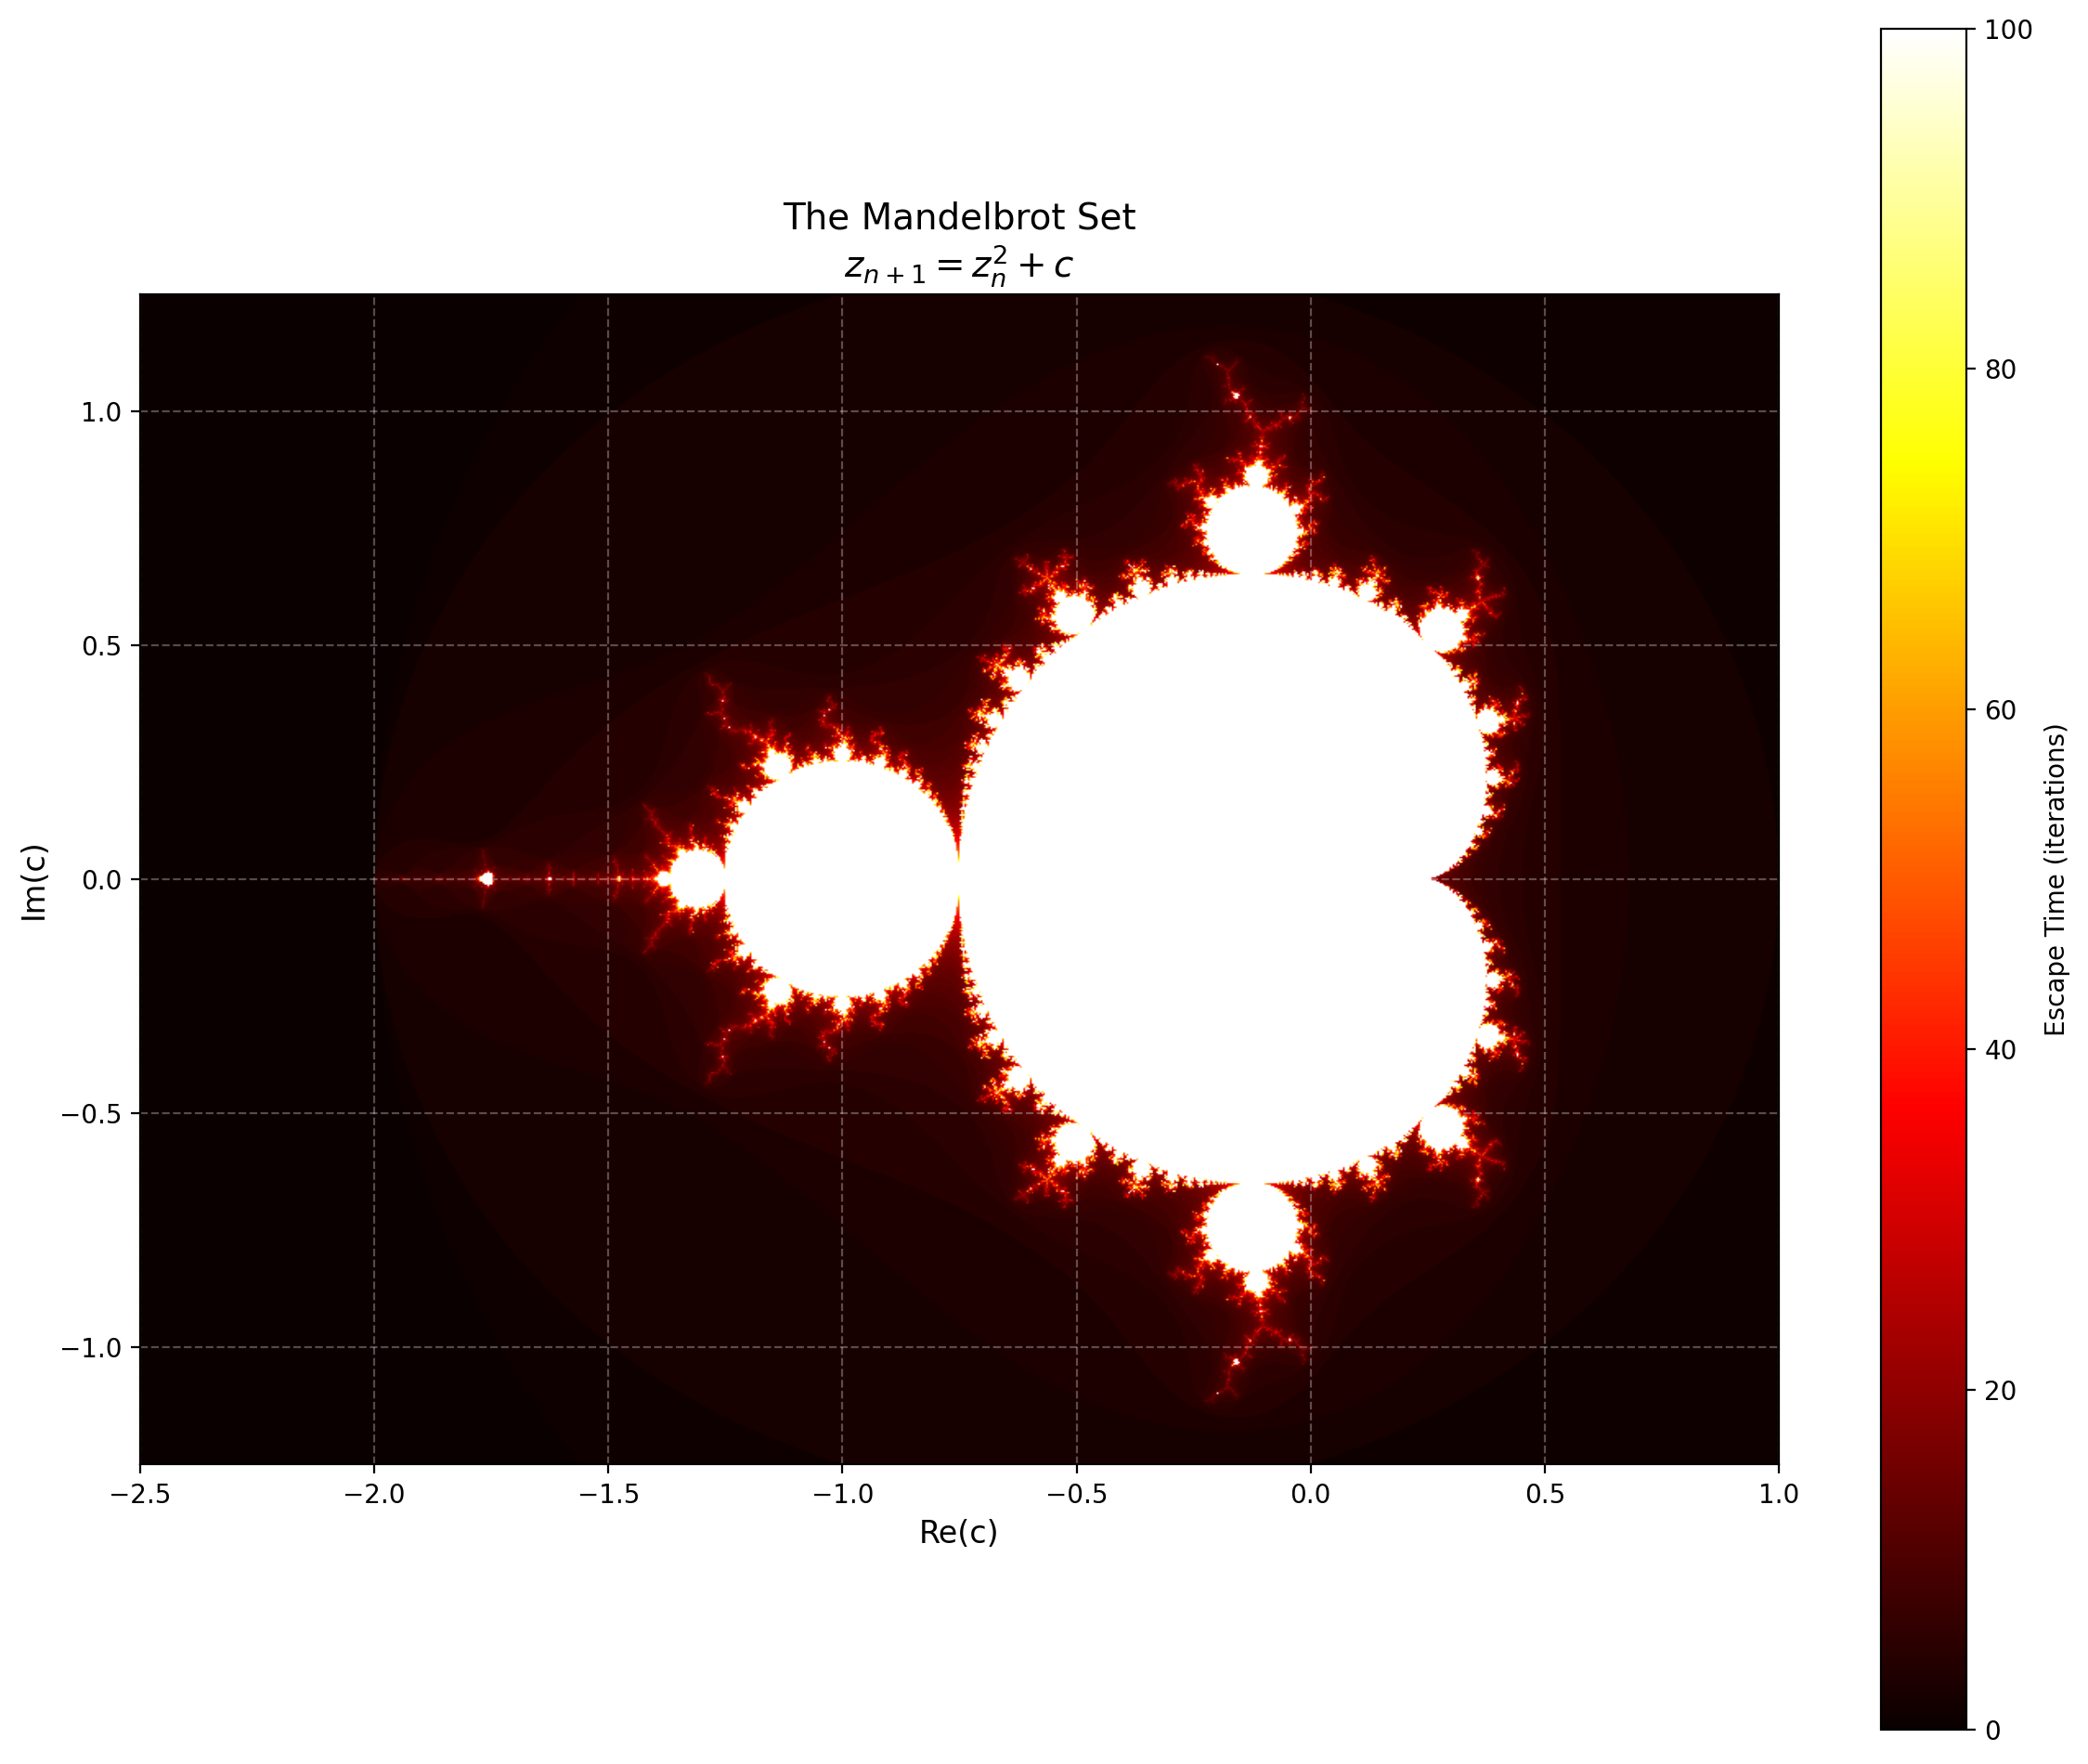

In [8]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 9.6))

# Plot the Mandelbrot set
im = ax.imshow(
    escape_times,
    extent=[x_min, x_max, y_min, y_max],
    cmap='hot',
    origin='lower',
    interpolation='bilinear'
)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Escape Time (iterations)')

# Labels and title
ax.set_xlabel('Re(c)', fontsize=12)
ax.set_ylabel('Im(c)', fontsize=12)
ax.set_title('The Mandelbrot Set\n$z_{n+1} = z_n^2 + c$', fontsize=14)

# Add grid
ax.grid(True, alpha=0.3, color='white', linestyle='--')

plt.tight_layout()

# Save the figure
plt.savefig('plot.png', dpi=150, bbox_inches='tight')
print("Figure saved to 'plot.png'")

plt.show()

## Zooming into the Fractal

One of the remarkable properties of the Mandelbrot set is its self-similarity at different scales. Let's zoom into the "Seahorse Valley" region, which exhibits intricate spiral patterns.

In [9]:
# Zoom into the Seahorse Valley
x_min_zoom, x_max_zoom = -0.75, -0.74
y_min_zoom, y_max_zoom = 0.09, 0.10

# Higher resolution for zoomed view
width_zoom = 800
height_zoom = 800
max_iter_zoom = 500

# Create zoomed complex plane
c_zoom = create_complex_plane(x_min_zoom, x_max_zoom, y_min_zoom, y_max_zoom, 
                               width_zoom, height_zoom)

# Compute Mandelbrot set for zoomed region
escape_times_zoom = mandelbrot(c_zoom, max_iter_zoom)

print(f"Zoomed computation complete for Seahorse Valley region.")

Zoomed computation complete for Seahorse Valley region.


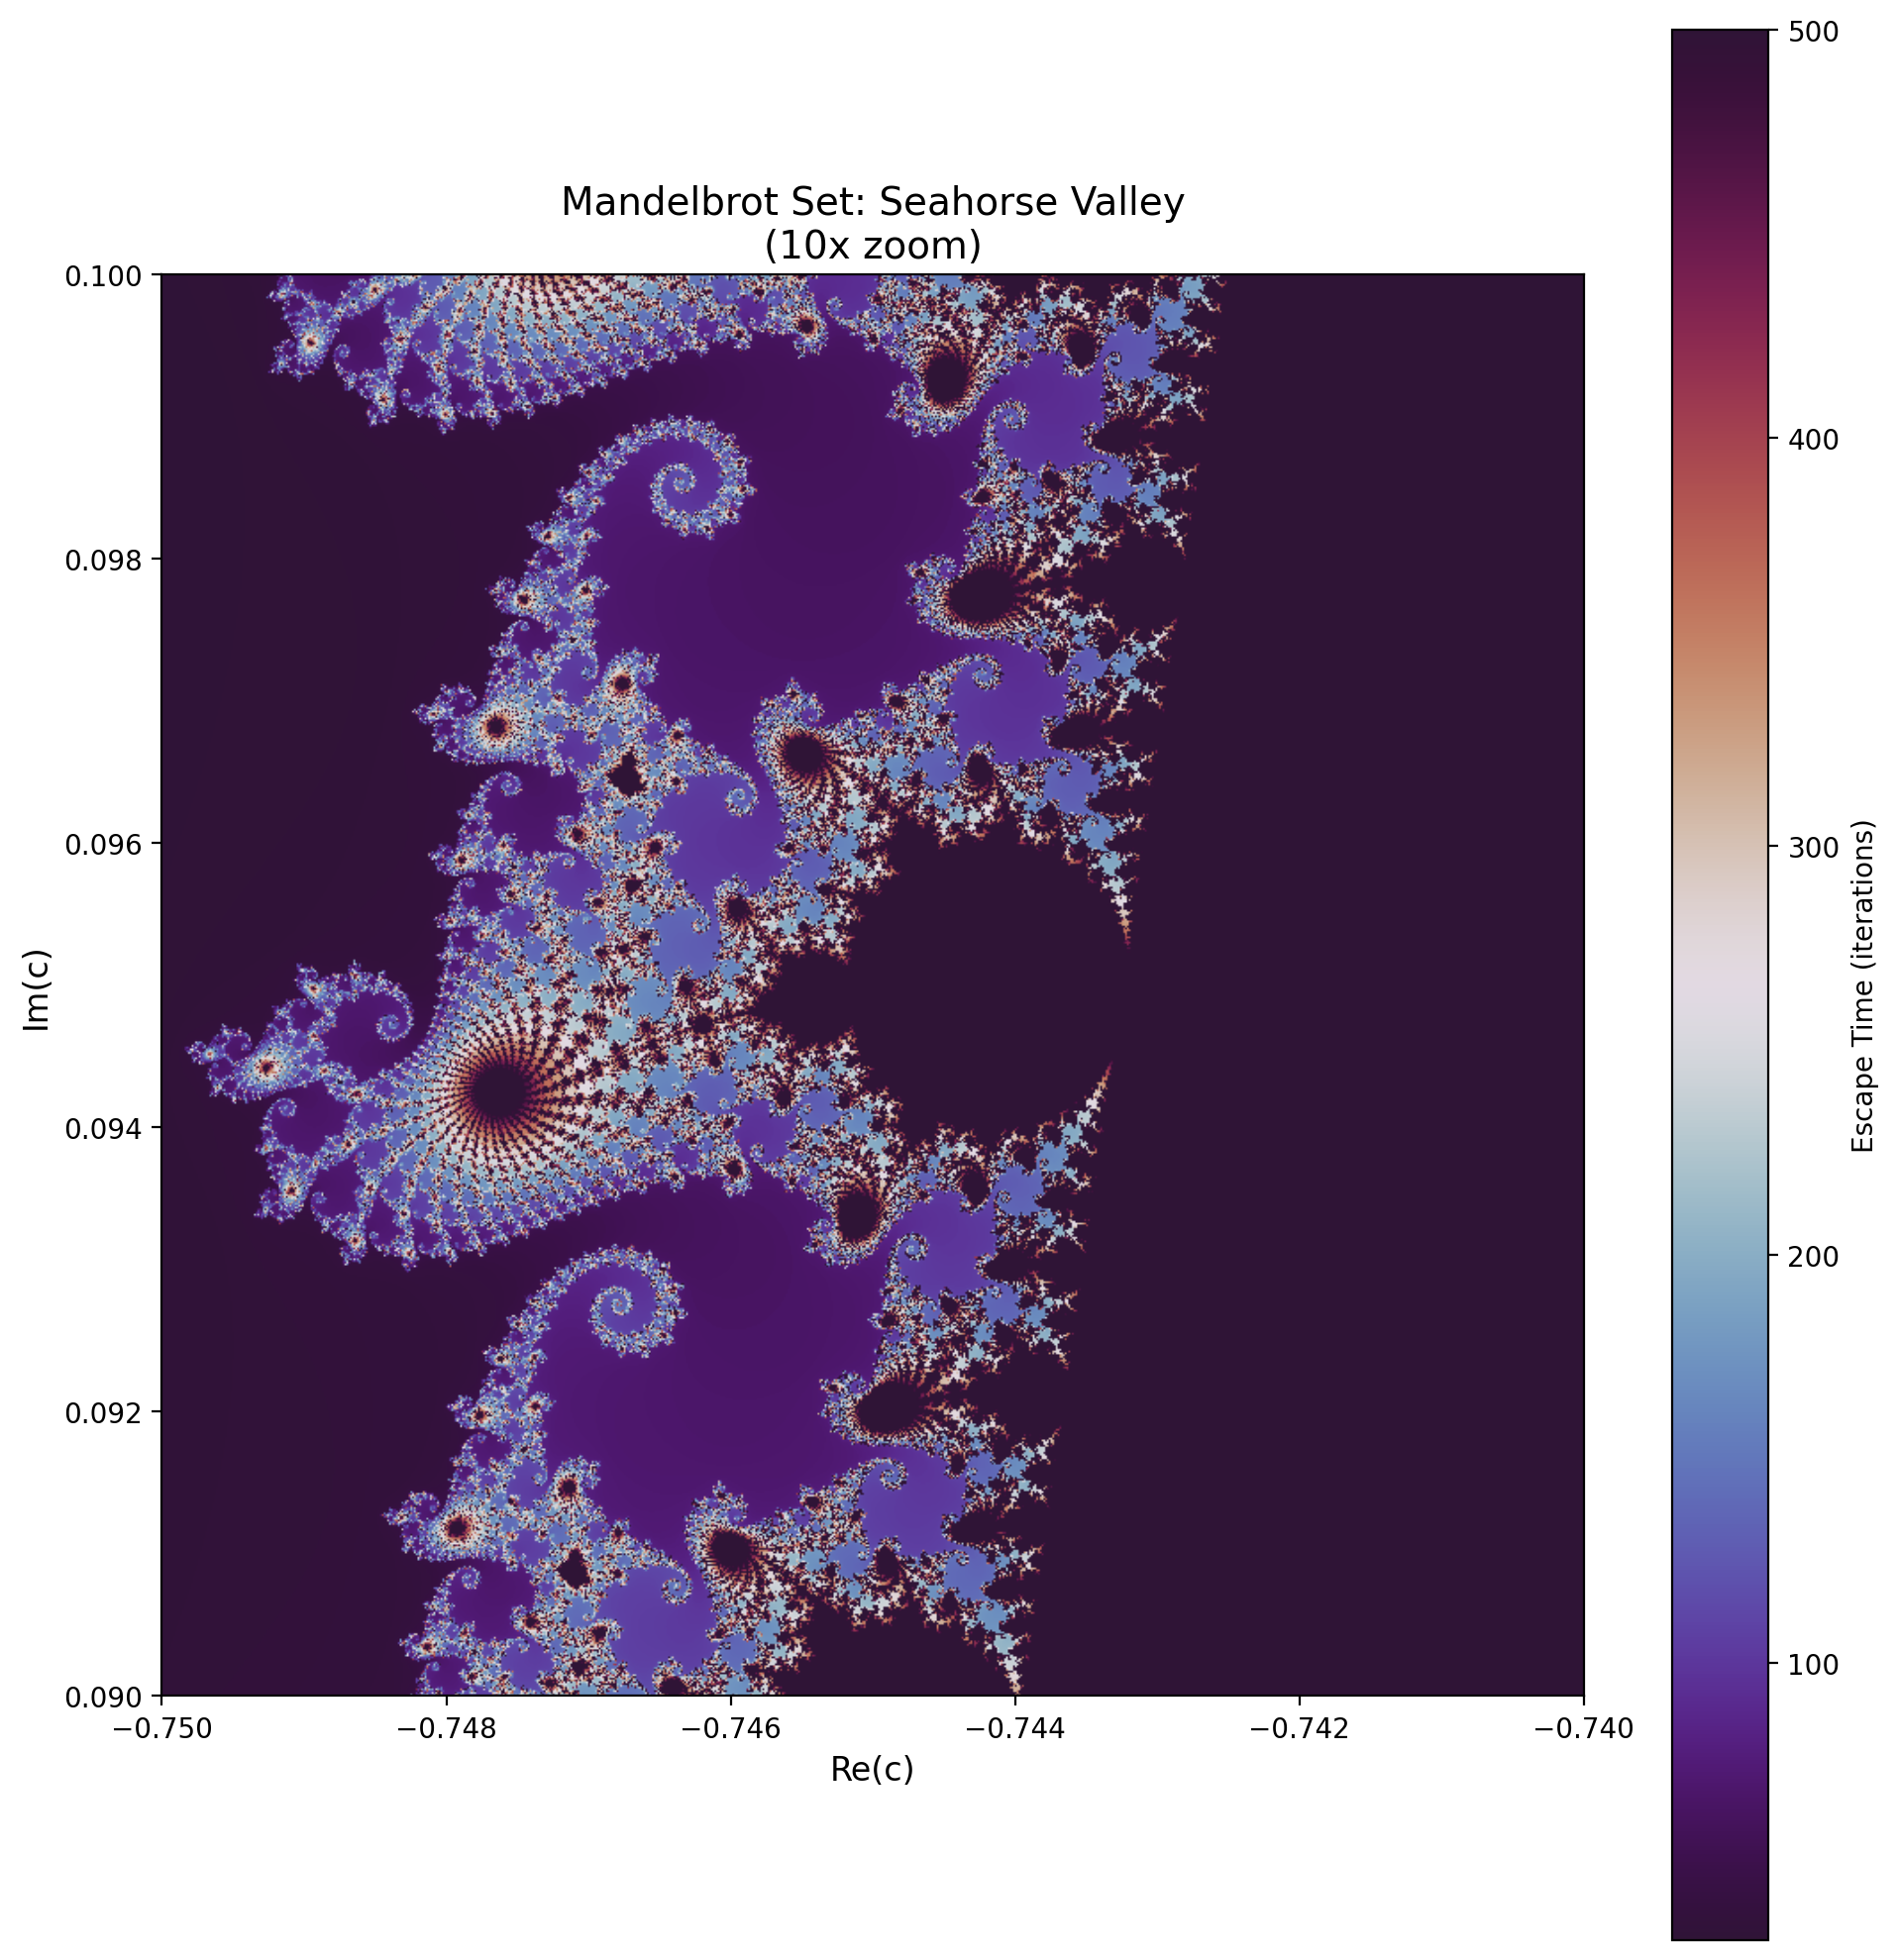

In [10]:
# Create zoomed figure
fig, ax = plt.subplots(figsize=(10, 10))

# Use a different colormap for variety
im = ax.imshow(
    escape_times_zoom,
    extent=[x_min_zoom, x_max_zoom, y_min_zoom, y_max_zoom],
    cmap='twilight_shifted',
    origin='lower',
    interpolation='bilinear'
)

cbar = plt.colorbar(im, ax=ax, label='Escape Time (iterations)')

ax.set_xlabel('Re(c)', fontsize=12)
ax.set_ylabel('Im(c)', fontsize=12)
ax.set_title('Mandelbrot Set: Seahorse Valley\n(10x zoom)', fontsize=14)

plt.tight_layout()
plt.show()

## Conclusion

The Mandelbrot set demonstrates several key concepts in mathematics:

1. **Iterative dynamics**: Simple rules ($z \mapsto z^2 + c$) can generate infinite complexity
2. **Fractals**: Self-similar structures that appear at every scale
3. **Complex analysis**: The behavior of complex functions under iteration
4. **Computational mathematics**: Efficient algorithms for exploring mathematical objects

The boundary of the Mandelbrot set is infinitely complex—no matter how far you zoom in, new details continue to emerge. This makes it both a beautiful mathematical object and a powerful tool for understanding chaotic dynamical systems.